<a href="https://colab.research.google.com/github/abbab23/colab/blob/main/cali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
cali=fetch_california_housing()

In [3]:
df=pd.DataFrame(data=cali.data,columns=cali.feature_names)
df['target']=cali.target

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [6]:
df.shape

(20640, 9)

In [7]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'target'],
      dtype='object')

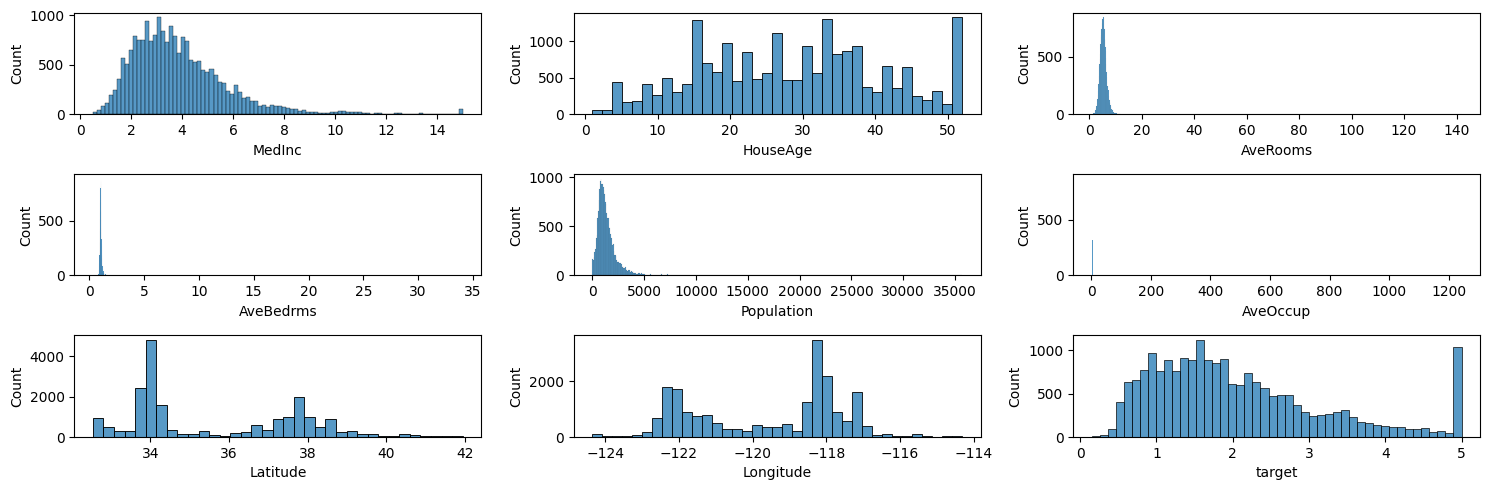

In [8]:
fig,axes=plt.subplots(nrows=3, ncols=3,figsize=(15,5))
axes=axes.flatten()
for i,col in enumerate(df.columns):
    sns.histplot(data=df,x=col,ax=axes[i])
fig.tight_layout()
plt.show()

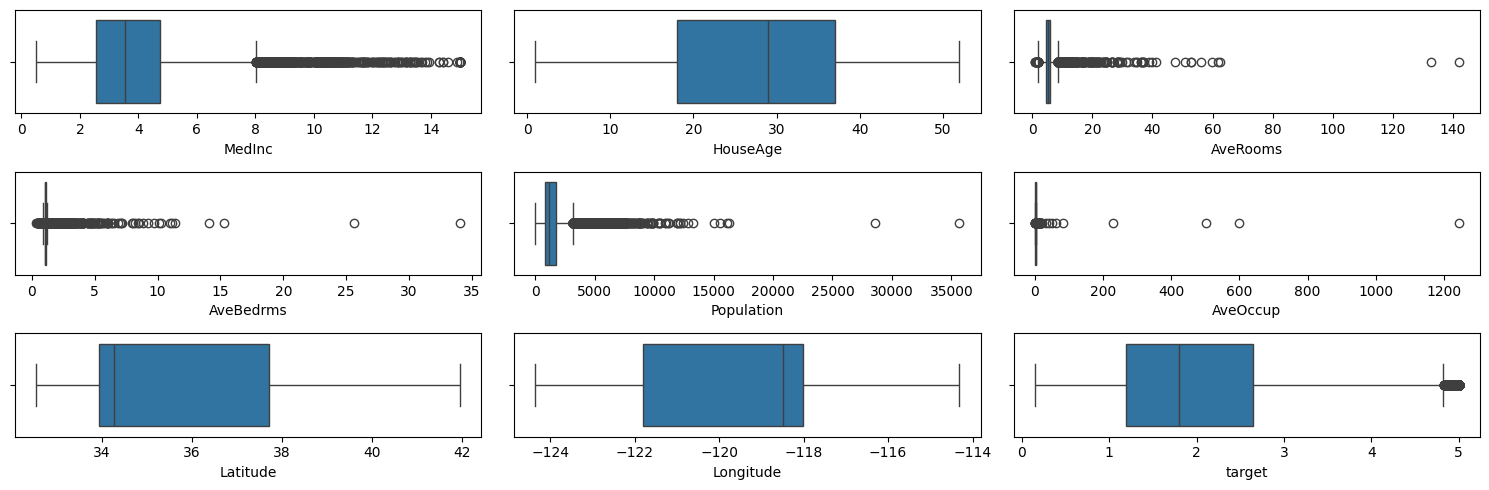

In [9]:
fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(15,5))
axes=axes.flatten()
for i,col in enumerate(df.columns):
  sns.boxplot(data=df,x=col,ax=axes[i])
fig.tight_layout()
plt.show()

In [10]:
from scipy.stats import zscore
zscore=df.apply(zscore,axis=0)
threshhold=3
outliers=(np.abs(zscore)>threshhold).sum(axis=0)
outlier_summary=pd.DataFrame({"column": df.columns,"outliers":outliers})
print(outlier_summary)


                column  outliers
MedInc          MedInc       345
HouseAge      HouseAge         0
AveRooms      AveRooms       133
AveBedrms    AveBedrms       145
Population  Population       342
AveOccup      AveOccup         8
Latitude      Latitude         0
Longitude    Longitude         0
target          target         0


In [11]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [12]:
df.duplicated().sum()

0

In [13]:

from scipy.stats import zscore
zscore=df.apply(zscore,axis=0)
threshhold=3
outliers=(np.abs(zscore)>threshhold)
filtered_df = df[~outliers.any(axis=1)]

In [14]:
filtered_df.shape

(19794, 9)

In [15]:
df=filtered_df


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

In [18]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [20]:
filtered_df=pd.DataFrame(df_scaled,columns=df.columns)

In [21]:
filtered_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,2.862381,0.966294,1.424948,-0.333600,-1.259520,-0.424668,1.049979,-1.320935,2.257376
1,2.847548,-0.640402,0.814260,-0.717241,1.301547,-0.928521,1.040621,-1.315944,1.407748
2,2.196891,1.849977,2.492445,0.033108,-1.045173,-0.145784,1.035941,-1.325926,1.349962
3,1.190802,1.849977,0.469794,0.030249,-0.968797,-0.433271,1.035941,-1.330916,1.252449
4,0.070911,1.849977,0.850047,0.089512,-0.960174,-0.847553,1.035941,-1.330916,1.260575
...,...,...,...,...,...,...,...,...,...
19789,-1.353742,-0.319062,-0.162102,0.475541,-0.615249,-0.418959,1.798671,-0.752010,-1.123982
19790,-0.732688,-0.881406,0.712667,1.823493,-1.217636,0.216575,1.803351,-0.811897,-1.133011
19791,-1.266676,-0.961741,-0.031049,0.377720,-0.415686,-0.684579,1.775275,-0.816888,-0.995770
19792,-1.162471,-0.881406,0.070436,0.760611,-0.743364,-0.913410,1.775275,-0.866793,-1.064391


In [22]:
df=filtered_df

In [23]:
x=df.drop('target',axis=1)
y=df['target']

In [24]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

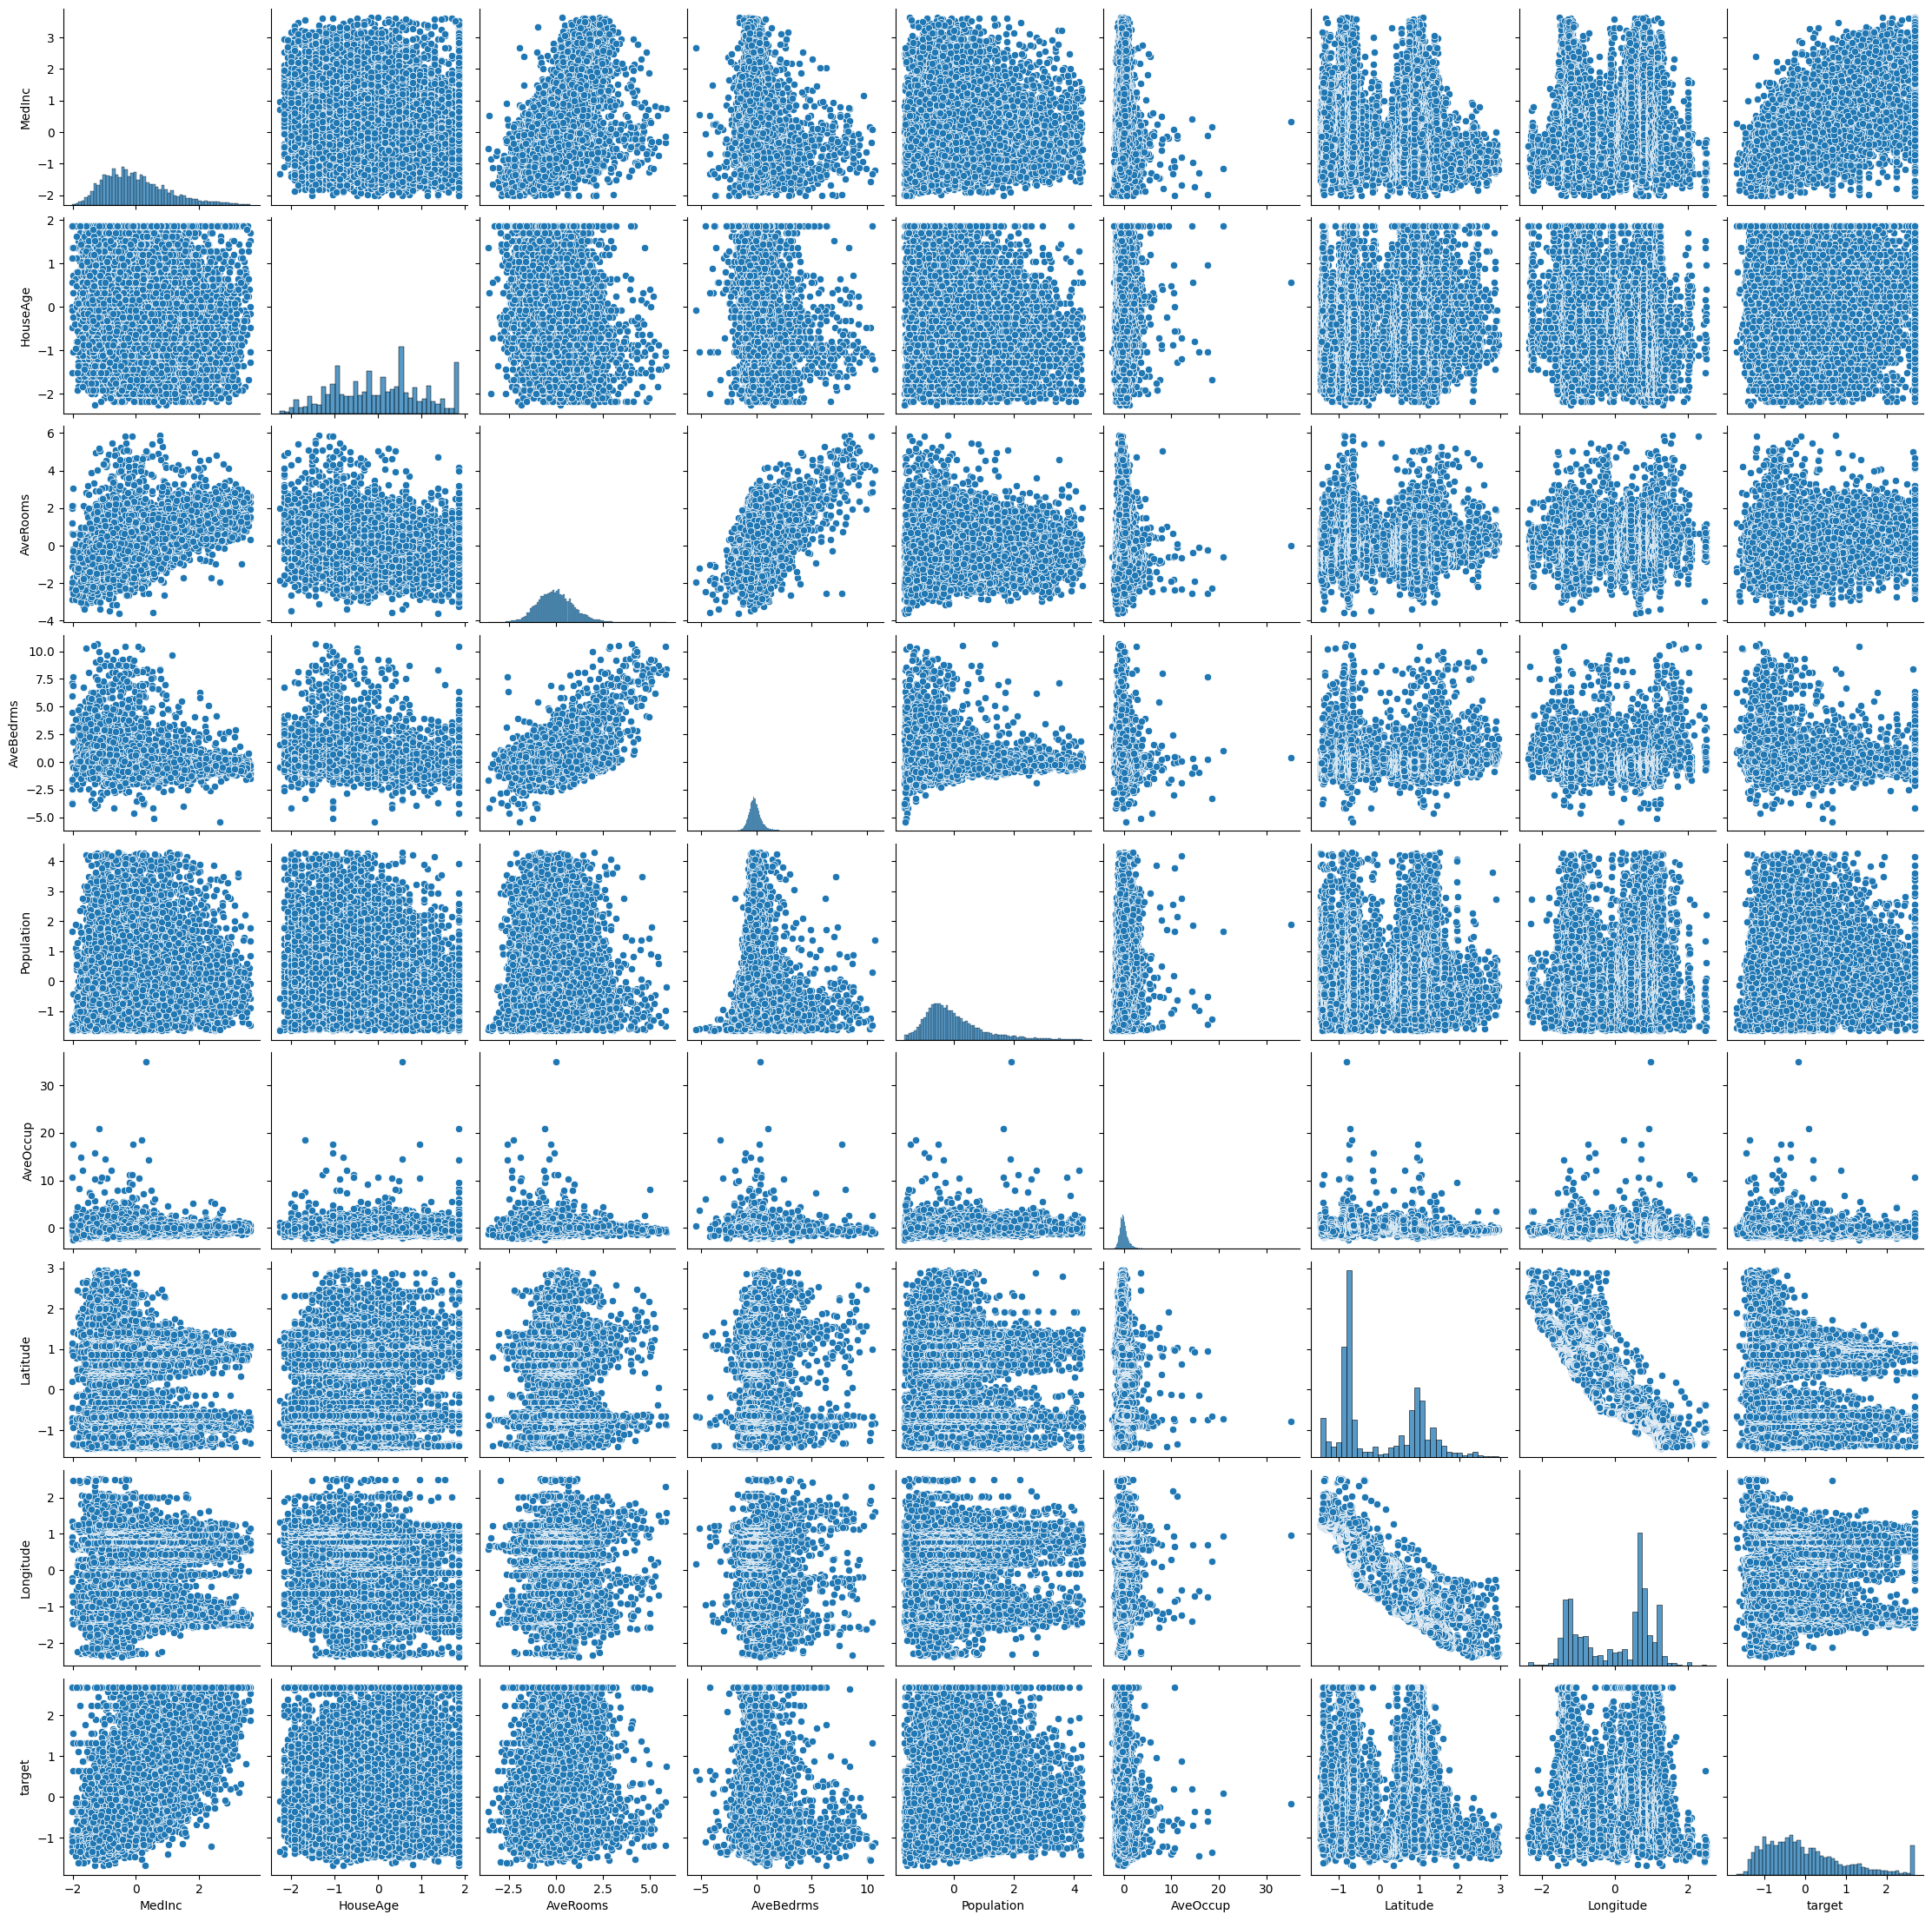

In [25]:
sns.pairplot(df)

In [26]:
LR=LinearRegression()
LR.fit(xtrain,ytrain)
ypred=LR.predict(xtest)

In [27]:
mean_squared_error(ytest,ypred)

0.3856853390796632

In [28]:
r2_score(ytest,ypred)

0.616227147818564

In [29]:
from sklearn.feature_selection import SelectKBest,f_regression
kbest=SelectKBest(score_func=f_regression,k=5)
kbest.fit(xtrain,ytrain)

SelectKBest(k=5, score_func=<function f_regression at 0x7fb12dbe5b40>)

In [30]:
kbest.scores_

array([1.22455747e+04, 1.95062262e+02, 1.14921013e+03, 1.37506061e+02,
       9.07074123e+00, 1.07077363e+03, 3.25148085e+02, 3.62438605e+01])

In [31]:
kbest.get_support()

array([ True,  True,  True, False, False,  True,  True, False])

In [32]:
selected_features=xtrain.columns[kbest.get_support()]

In [33]:
selected_features

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Latitude'], dtype='object')

In [34]:
ridge=Ridge()
lasso=Lasso()
xgb=XGBRegressor()
rf=RandomForestRegressor()
models=[ridge,lasso,xgb,rf]
for i in models:
  i.fit(xtrain,ytrain)
  ypred=i.predict(xtest)
  print(i)
  print(mean_squared_error(ytest,ypred))
  print(r2_score(ytest,ypred))
  print()
#

Ridge()
0.3856758305638391
0.6162366091847817

Lasso()
1.005367845755121
-0.00038255687301380625

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
0.1836721124876197
0.817238657181615

RandomForestRegressor()
0.21114753680442078
0.7898994744682789

